# Battle of the Neighborhoods- Week 2

## Part 4: Downloading and exploring Farmers Market dataset

In [1]:
!pip install geopy
!pip install seaborn
!pip install folium
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

import seaborn as sns

import folium 

print('Libraries imported.')


Libraries imported.


The dataset is downloaded from the website. The link is as given below :

https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

In [2]:
# The code was removed by Watson Studio for sharing.

,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Urban Oasis Farmers' Market,681 Clarkson Ave.,40.656255,-73.936608,Wednesday,2pm-5:30pm,06/24/20-11/04/20,No,No,NaN,NaN,"(40.656255, -73.936608)"
1,Staten Island,Goodhue Center Go!Healthy Farm Stand,301 Prospect Ave,40.638983,-74.097422,Tuesday,11am-2pm,07/06/20-11/20/20,Yes,No,NaN,NaN,"(40.638983, -74.097422)"
2,Manhattan,Morningside Park's Down to Earth Farmers' Market,W 110th St & Manhattan Ave,40.801155,-73.959647,Saturday,9am-4pm (winter closes at 3pm),Year-Round,Yes,Yes,NaN,NaN,"(40.801155, -73.959647)"
3,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30pm-6:30pm,7/15/20-11/25/20,Yes,No,NaN,NaN,"(40.839882, -73.916783)"
4,Manhattan,Go!Healthy Farm Stand at Mirabal Sisters Campus,21 Jumel Pl.,40.839305,-73.936159,Friday,11am-2pm,07/07/2020-11/20/20,Yes,No,NaN,NaN,"(40.839305, -73.936159)"


In [3]:
fm_data.shape

(141, 13)

In [4]:
fm_data['Borough']= fm_data['Borough'].replace(to_replace= 'BRooklyn', value= 'Brooklyn', regex= True)

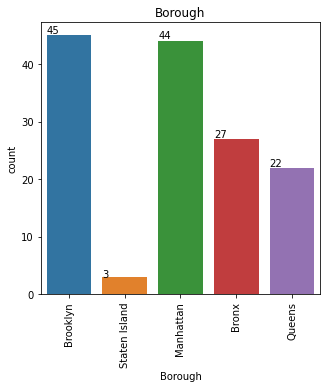

In [5]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=fm_data)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

Brooklyn and Manhattan have the highest number of farmers markets

#### Using geopy library to get the coordinates of NYC

In [6]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [7]:
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, MarketName, borough in zip(fm_data['Latitude'], fm_data['Longitude'], fm_data['Market Name'], fm_data['Borough']):
            label = '{}, {}'.format(MarketName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets